AI_no_ML.ipynb - AI Training Software  
Copyright (C) 2024 AI Institute, University of South Carolina

Authors:    Homayoun Valafar,
            Andrew Smith,
            Christopher Lee,
            Alireza Bagheri,
            Musa Azim, 
            Kuba Jerzmanowski
         

This program is free software: you can redistribute it and/or modify  
it under the terms of the GNU General Public License as published by  
the Free Software Foundation, either version 3 of the License, or  
(at your option) any later version.  

This program is distributed in the hope that it will be useful,  
but WITHOUT ANY WARRANTY; without even the implied warranty of  
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the  
GNU General Public License for more details.  

You should have received a copy of the GNU General Public License  
along with this program. If not, see <https://www.gnu.org/licenses/>.  

For inquiries or permissions, contact: Dr. Valafar (homayoun@cse.sc.edu)


# Machine Learning in Python - AI not ML Workshop
<a href="https://www.scinbre.org/learning/bids-tutorials-and-workshops/2025-summer-workshops"> Bioinformatics/Data Science
Summer Workshops 2025 Link
</a>

### May 27th, 2025

# First hour - Random Number Generators

Random number generation (RNG) is a process used to produce a sequence of random numbers.

- Random numbers are typically generated to correspond to samples from a specific probability distribution, commonly the uniform distribution over the [0, 1) interval.

- In most applications, including those we will explore, the numbers generated are not truly random but pseudorandom. This means they are produced by a deterministic algorithm that starts with an initial value called a seed. The sequence of numbers appears random but can be reproduced if the seed is known.

Most of the functionality we will need can be found in the `np.random` module of NumPy. Let us begin by creating some random numbers with a uniform distribution.

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
np.random.random(size=10)

array([0.42799838, 0.826518  , 0.97248084, 0.96813443, 0.95252765,
       0.63299305, 0.49308203, 0.6867883 , 0.87220291, 0.01686232])

The `random()` function within the `np.random` module produces random numbers within the interval [0,1). You can specify the number of random numbers you want to generate using the `size` keyword argument. The numbers are returned in the form of a NumPy array.

To verify that the numbers are being correctly generated from a uniform distribution, we can plot their cumulative distribution functions (CDF). We will generate 100,000 random numbers and plot these along with the CDF to observe their distribution.

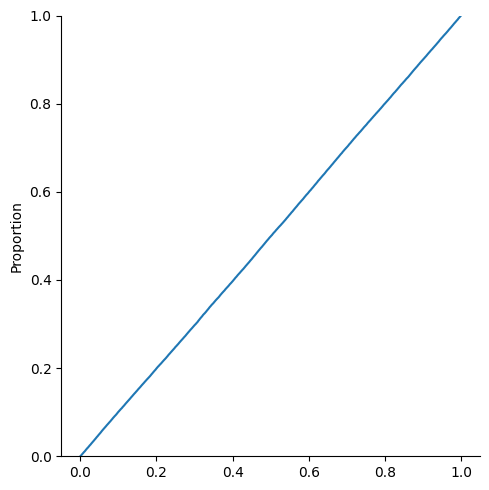

In [35]:
# Generate sorted random numbers
x = np.sort(np.random.random(size=100000))

# Plot the emperical CDF
sns.displot(x=x, kind="ecdf")


It appears that our random number generator is performing well.

Generating random numbers uniformly is one of the most frequently utilized techniques in random number generation. In fact, many other random generation methods are based on outputs from the uniform distribution. For instance, simulating "coin flips," where the outcome is either zero or one, can be achieved using this method:

In [36]:
# Generate 30 random numbers on uniform interval [0. 1]
x = np.random.random(size=30)

# Make them coin flips
heads = x > 0.5

# Show which were heads, and count the number of heads
print(heads)
print(f'\nThere were {np.sum(heads)} heads out of {len(x)} draws.')

[False  True False False False False  True False False  True False False
  True  True  True  True  True  True  True False  True  True False False
  True  True  True  True False  True]

There were 17 heads out of 30 draws.


## Seeding Random Number Generators

To show that random number generation operates deterministically, we can seed the random number generator explicitly. Normally, generators are seeded with values like the current date/time to ensure uniqueness in the sequences produced.


By setting a specific seed, we can demonstrate that the same sequence of random numbers is produced each time.

In [37]:
# Seed the RNG
np.random.seed(42)

# Generate random numbers
numbers00 = np.random.random(size=10)
numbers00

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
       0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258])

In [38]:
# Re-seed the RNG
np.random.seed(42)

# Generate random numbers
numbers01 = np.random.random(size=10)
numbers01

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
       0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258])

In [39]:
numbers00 == numbers01

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

The random numbers are exactly the same. If we choose a different seed, we get a different sequence of numbers.

In [40]:
# Re-seed the RNG
np.random.seed(1802)

# Generate random numbers
numbers02 = np.random.random(size=10)
numbers02

array([0.86604775, 0.58409572, 0.67756477, 0.48096262, 0.19237137,
       0.41804616, 0.35736691, 0.69185675, 0.28587762, 0.49888831])

In [41]:
numbers02 == numbers01

array([False, False, False, False, False, False, False, False, False,
       False])

## Generating Random Numbers from Various Distributions

It is also possible to generate random numbers from different probability distributions. For instance, consider drawing random samples from a Normal distribution characterized by a mean (μ) and standard deviation (σ).

In [42]:
# Set parameters
mu = 10
sigma = 1

# Draw 10000 random samples
draws = np.random.normal(mu, sigma, size=10000)
draws

array([10.68076347, 11.8897269 ,  9.9319032 , ..., 12.09087873,
       10.60299266,  8.53821633], shape=(10000,))

Let's plot a histogram to visualize the genarated data distribution.

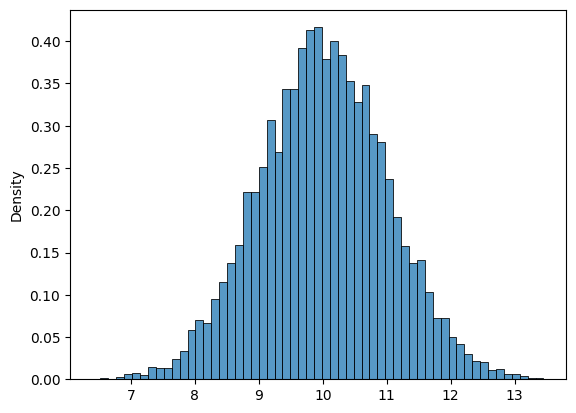

In [43]:
# Plot a histogram of our draws
sns.histplot(draws, stat="density");

Last week we covered Seaborn and discussed Matplotlib. To create the same distribution plot in Matplotlib, you can use this approach:

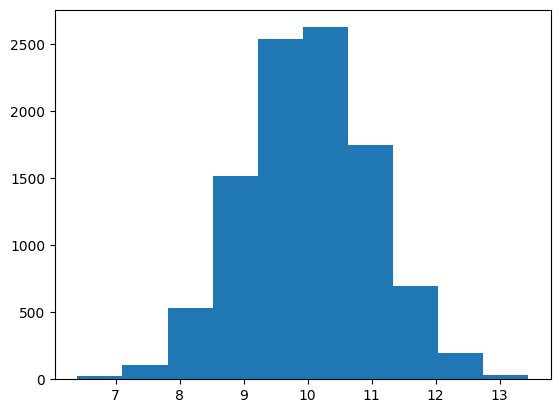

In [44]:
#Simplest approach
plt.hist(draws)
plt.show()

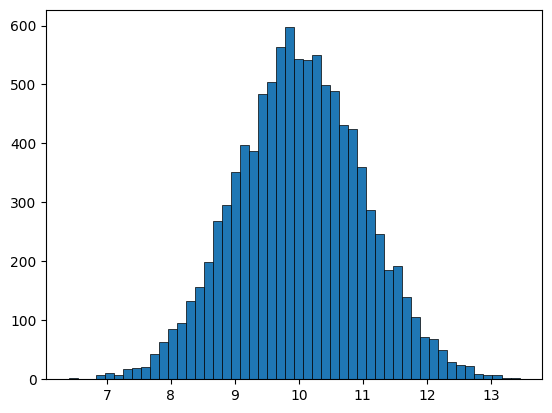

In [45]:
#Make it look nicer
plt.hist(draws, bins=50, edgecolor='black', linewidth=0.5)
plt.show()

Let's apply a test to compare our sampled distribution against a true normal distribution using the same μ value we used for sampling.

We will use a new library called SciPy, which contains many scientific and statistical tools for Python.

In [46]:
from scipy.stats import ttest_1samp

test_result = ttest_1samp(a=draws, popmean=mu) # Parameters: a = our sampled data, popmean = the expected mean we are comparing it to
test_result

TtestResult(statistic=np.float64(0.8656482587076136), pvalue=np.float64(0.3867038512759098), df=np.int64(9999))

In [47]:
p_val = test_result[1]
print(f"p-value={p_val:.3f}")

p-value=0.387


Since the p-value >= 0.05, we cannot conclude that the means are significantly different. (This result is expected since both samples come from the same distribution.)

## Generating Random Numbers from Discrete Distributions

Until now, our generated random numbers have been derived from continuous probability distributions. It is also possible to generate random numbers from discrete distributions. We have demonstrated this capability with the "coin flips" example, but it extends to other types of distributions. A common example involves selecting a random integer from a specified set. For instance, to randomly select one integer from the set `{0, 1, 2, 3}`, we can use the `np.random.randint()` function.

In [48]:
# Draw random integers on [0, 5), i.e., exclusive of last one.
np.random.randint(0, 5, 20)

array([4, 4, 1, 2, 2, 3, 4, 3, 3, 1, 4, 4, 0, 2, 2, 2, 2, 3, 2, 1])

For example, this can be used to generate random DNA sequences. 

Note that:

In [49]:
base = np.array(['A', 'T', 'G', 'C'])

base[0] #gives you 'A' as expected

np.str_('A')

Because `base` is a numpy array we can do this:

In [50]:
base[[0,0,3,2,1,0]]

array(['A', 'A', 'C', 'G', 'T', 'A'], dtype='<U1')

Knowing this we can now generate a random DNA sequence.

Let us see an example:

In [51]:
x = np.random.randint(0, 4, 50)
x

array([0, 2, 0, 3, 0, 2, 2, 0, 3, 2, 3, 3, 0, 2, 3, 3, 3, 3, 2, 0, 3, 1,
       0, 3, 0, 0, 3, 1, 1, 2, 1, 3, 1, 3, 3, 0, 2, 0, 0, 2, 1, 0, 2, 3,
       3, 1, 1, 1, 3, 1])

In [52]:
dna_array = base[x]

In [53]:
#join the element together
''.join(dna_array)

'AGACAGGACGCCAGCCCCGACTACAACTTGTCTCCAGAAGTAGCCTTTCT'

## Selecting Elements from an Array Randomly

Randomly selecting elements from an array is a common task. The np.random.choice() function is specifically designed for this. Alternatively, you could achieve similar results using np.random.randint() by using the integers to represent indices in the array. However, `np.random.choice()` includes a useful keyword argument, `replace`, which allows you to specify whether to draw elements with or without replacement. For instance, if you have 100 samples and need to send only 20 to a testing facility, using `np.random.randint()` might lead to duplicate selections.

In [54]:
x = np.random.randint(0, 51, 20) # 20 random ints from 0-50
x

array([39, 40, 50,  3, 39, 49, 44, 42,  6, 33, 48, 19, 42, 15, 42, 18, 11,
       40, 40, 40])

In [55]:
np.unique_counts(x)

UniqueCountsResult(values=array([ 3,  6, 11, 15, 18, 19, 33, 39, 40, 42, 44, 48, 49, 50]), counts=array([1, 1, 1, 1, 1, 1, 1, 2, 4, 3, 1, 1, 1, 1]))

In [56]:
import pandas as pd
df = pd.DataFrame(np.unique(x, return_counts=True),index=['values', 'counts']).T
df = df.set_index('values')
df = df.sort_values('counts', ascending=False)
df

,counts
values,
40,4
42,3
39,2
3,1
6,1
11,1
15,1
18,1
19,1


What if I just wanted to sample 20 numbers [0-50] without replacement?

In [57]:
x_without_replacement = np.random.choice(range(51), 20, replace=False)

In [58]:
df = pd.DataFrame(np.unique(x_without_replacement, return_counts=True),index=['values', 'counts']).T
df = df.set_index('values')
df = df.sort_values('counts', ascending=False)
df

,counts
values,
0,1
2,1
48,1
46,1
42,1
39,1
31,1
29,1
25,1


## Shuffling an Array

The np.random.permutation() function is handy for rearranging the elements in an array. It mixes up the order of entries! For example, let us use it to shuffle a deck of cards.


In [59]:
# First lets make the deck
values = ['A'] + list(np.arange(2, 11).astype(str)) + ["J", "Q", "K"]
values

['A',
 np.str_('2'),
 np.str_('3'),
 np.str_('4'),
 np.str_('5'),
 np.str_('6'),
 np.str_('7'),
 np.str_('8'),
 np.str_('9'),
 np.str_('10'),
 'J',
 'Q',
 'K']

In [60]:
kinds = ["♦", "♣", "♥", "♠"]
deck = []
for kind in kinds:
    deck.extend([value+kind for value in values])

print(deck)

['A♦', '2♦', '3♦', '4♦', '5♦', '6♦', '7♦', '8♦', '9♦', '10♦', 'J♦', 'Q♦', 'K♦', 'A♣', '2♣', '3♣', '4♣', '5♣', '6♣', '7♣', '8♣', '9♣', '10♣', 'J♣', 'Q♣', 'K♣', 'A♥', '2♥', '3♥', '4♥', '5♥', '6♥', '7♥', '8♥', '9♥', '10♥', 'J♥', 'Q♥', 'K♥', 'A♠', '2♠', '3♠', '4♠', '5♠', '6♠', '7♠', '8♠', '9♠', '10♠', 'J♠', 'Q♠', 'K♠']


In [61]:
deck_prem = np.random.permutation(deck)

print(deck_prem)
len(deck_prem)

['6♦' '4♣' '2♥' '7♦' '10♣' '10♦' 'K♦' '10♠' '8♣' '7♠' '9♣' '4♦' '2♣' 'K♣'
 '10♥' 'J♣' 'J♦' 'Q♠' 'Q♦' '8♦' 'A♥' '9♠' '3♦' '4♥' '8♥' 'J♥' '6♣' '7♣'
 'A♠' '5♦' '7♥' '2♠' 'K♠' 'A♣' 'Q♣' '8♠' '2♦' '9♦' '3♣' 'J♠' '5♠' '4♠'
 '3♥' '6♠' '3♠' '5♣' 'A♦' '5♥' '9♥' 'K♥' '6♥' 'Q♥']


52

## The Random Module

The `np.random` is part of the NumPy library, but Python has its own standard `random` library that can accomplish much the same functionality. Take for example Python's `random.choice`

In [62]:
import random
random.choice(['A', 'T', 'C', 'G'])

'T'

## Hour 1 Exercise: Simulate a Simple Lottery Draw

In this exercise, you'll create a Python script to simulate a lottery draw using the random module. The task will help you understand random number generation and list manipulation.

**Task:**

1.Generate Lottery Tickets:
*    Write a script to generate 100 lottery tickets.
*    Each ticket is a combination of 6 digits, where each number is between 0 and 9.

Note ypu can do: 
``` 
number = "123"
padded_number = number.zfill(5)
print(padded_number)  # Output: 00123 
```

In [63]:
#Lets first generate 100 numbers WITHOUT replacment

In [64]:
# Use the ".zfill()" to zero pad

2. Simulate a Winning Ticket:
*    Randomly select one ticket from your list of 100 tickets to be the "winning" ticket.
*    Print out the winning ticket.

# Second hour - Understanding AI vs ML: From Rules to Learning

## Learning Objectives
In the next 
we will discuss:
1. The distinction between AI and Machine Learning
2. Create and evaluate rule-based AI systems
3. Recognize when rule-based approaches become insufficient
4. Discuss why machine learning becomes necessary
<br><br><br><br>

### What is Artificial Intelligence?

**Artificial Intelligence (AI)** is any system that exhibits intelligent behavior: the ability to perceive, reason, and act in ways that achieve specific goals.

**Machine Learning (ML)** is a subset of AI where systems learn patterns from data rather than following pre-programmed rules.

#### The Spectrum of Intelligence
```
Simple Rules → Complex Rules → Pattern Recognition → Deep Learning    
    ↑              ↑                    ↑                ↑            
 Thermostats    Chess Programs      Email Filters    Image Recognition
```

Today we'll start with **rule-based AI** - the foundation that helps us understand why ML became necessary.



## Creating Synthetic Data for Classification

Let's generate data that represents a real-world classification problem. Imagine we're trying to classify patients as "high risk" or "low risk" based on two medical measurements.


Moving forward, we'll frequently encounter the `sklearn` library. It's a powerful and useful Python library containing many tools for AI and ML applications.

In [65]:
from sklearn.datasets import make_classification

We will generate a dataset with the following structure:

 The dataset will contain 10,000 samples, with each sample belonging to one of 2 classes (high or low risk). Each sample will also have 2 features (information points that we can use to classify each point as either class 0 or class 1).

In [66]:
# Generate a synthetic dataset with easy separability
X, y = make_classification(
    n_samples=10000,      # Total number of samples
    n_features=2,        # Number of features (dimensions)
    n_informative=1,     # Number of informative features
    n_redundant=0,       # Number of redundant features
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0,            # Fraction of samples whose class is randomly exchanged
    class_sep=3,         # Separation between the classes
    hypercube=True,
    random_state=42
)


Does the shape of our data make sense?

In [67]:
print(f"Dataset shape: {X.shape}")
print(f"Labels shape: {y.shape}")
print(f"Classes: {np.unique(y)}")

Dataset shape: (10000, 2)
Labels shape: (10000,)
Classes: [0 1]


Yes!

`X` Contains the features with 10,000 points each with 2 features

`y` countins the class label (0 or 1) for each of the 10,000 data points


### Let's Examine Our Data

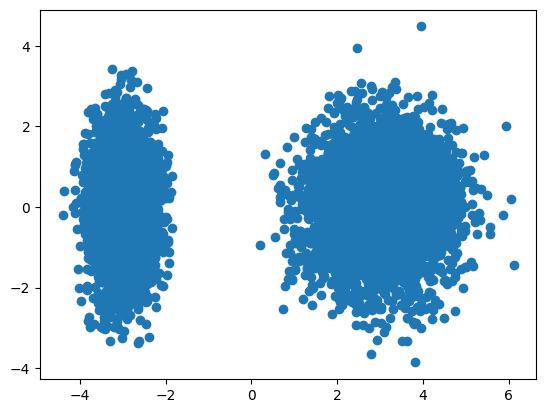

In [68]:
plt.scatter(X[:,0], X[:,1])

Lets make it look nicer.

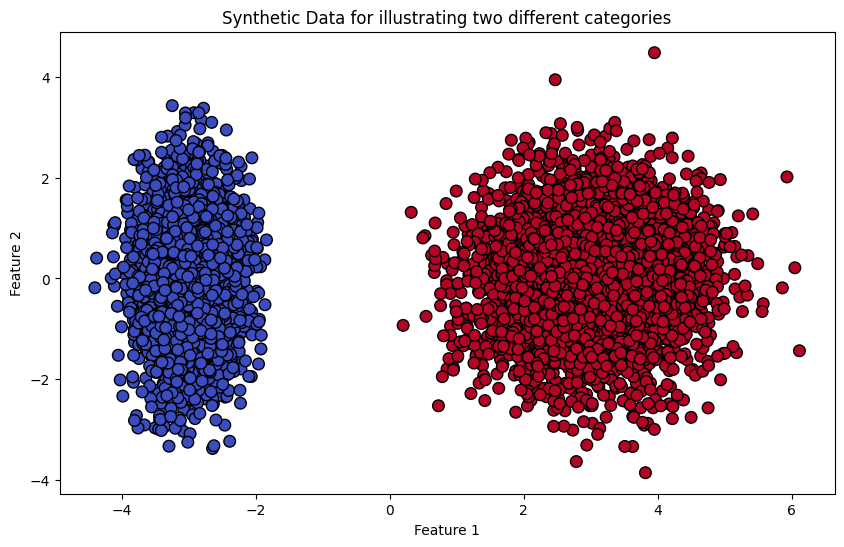

In [69]:
# Plot the generated dataset
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', marker='o', edgecolor='k', s=70)
plt.title("Synthetic Data for illustrating two different categories")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

To illustrate this concept, let's define class 0 as low-risk patients and class 1 as high-risk patients, each having two values (features) for each patient


Now lets show some basic statistics:

In [70]:
print("\nData Summary:")
print(f"Low Risk patients (Class 0): {np.sum(y==0)}")
print(f"High Risk patients (Class 1): {np.sum(y==1)}")
print(f"Feature 1 range: [{X[:,0].min():.2f}, {X[:,0].max():.2f}]")
print(f"Feature 2 range: [{X[:,1].min():.2f}, {X[:,1].max():.2f}]")


Data Summary:
Low Risk patients (Class 0): 5000
High Risk patients (Class 1): 5000
Feature 1 range: [-4.40, 6.11]
Feature 2 range: [-3.86, 4.48]



## Building Rule-Based AI


**Looking at the plot above. Can we identify a simple rule that separates the two groups?**

Let's explore the data systematically:

In [71]:
mask = (y == 0)
mask

array([False, False,  True, ..., False,  True,  True], shape=(10000,))

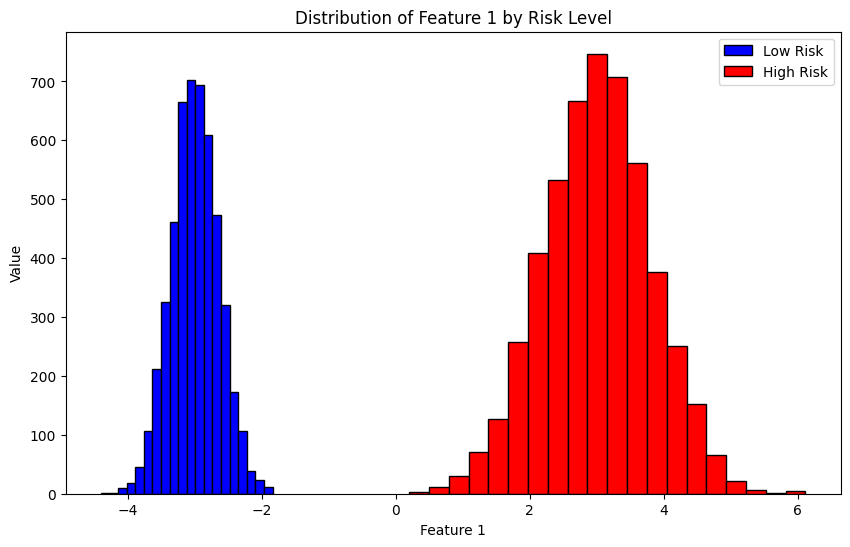

In [72]:
plt.figure(figsize=(10, 6))
plt.hist(X[mask, 0],  label='Low Risk', bins=20, color='blue', edgecolor='k')
plt.hist(X[~mask, 0],  label='High Risk', bins=20, color='red', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Value')
plt.title('Distribution of Feature 1 by Risk Level')
plt.legend()

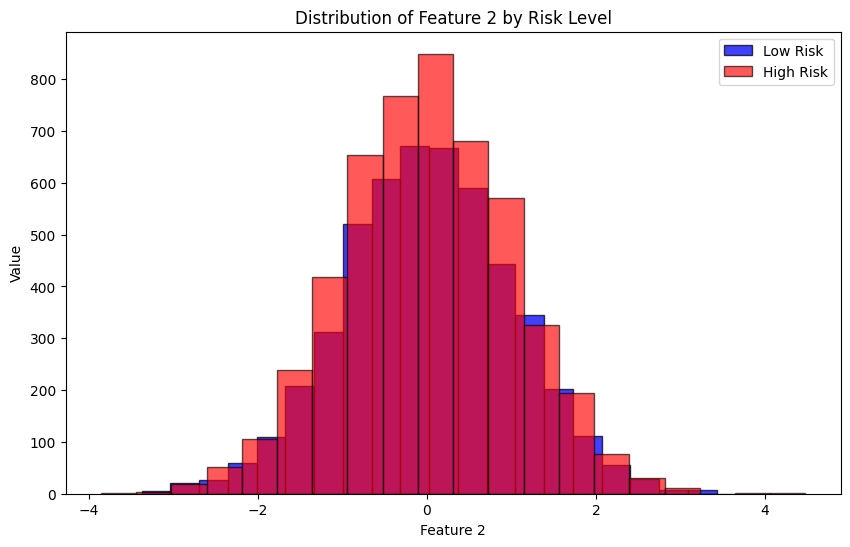

In [73]:
plt.figure(figsize=(10, 6))
plt.hist(X[mask, 1], alpha=0.75, label='Low Risk', bins=20, color='blue', edgecolor='k')
plt.hist(X[~mask, 1],   alpha=0.65, label='High Risk', bins=20, color='red', edgecolor='k')
plt.xlabel('Feature 2')
plt.ylabel('Value')
plt.title('Distribution of Feature 2 by Risk Level')
plt.legend()


Lets looks at some statistics to help identify the pattern

In [74]:
print("Mean values by class:")
print(f"Low Risk - Feature one: {X[mask, 0].mean():.2f}, Feature two: {X[mask, 1].mean():.2f}")
print(f"High Risk - Feature one: {X[~mask, 0].mean():.2f}, Feature two: {X[~mask, 1].mean():.2f}")

Mean values by class:
Low Risk - Feature one: -3.00, Feature two: 0.01
High Risk - Feature one: 3.01, Feature two: 0.02


Could we establish a decision rule for classifying future data points?

The Feature 1 axis seems informative



**Rule based AI**

```
if(Feature1 > -1.0):
    print("The new point belongs to group RED")
else:
    print("The new point belongs to group Blue")
```


What does this look like?


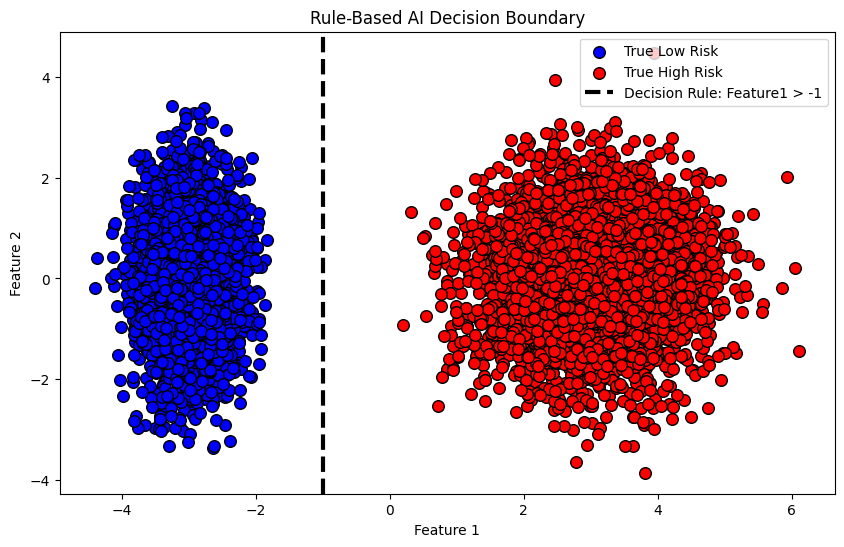

In [75]:
plt.figure(figsize=(10, 6))

# Plot 1: Original data with decision line
plt.scatter(X[mask, 0], X[mask, 1], c='blue', marker='o', edgecolor='k', s=70,label='True Low Risk')
plt.scatter(X[~mask, 0], X[~mask, 1], c='red', marker='o', edgecolor='k', s=70,label='True High Risk')
plt.axvline(x=-1, color='black', linestyle='--', linewidth=3, label=f'Decision Rule: Feature1 > -1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Rule-Based AI Decision Boundary')
plt.legend()

In [76]:
# Test our rule on a few examples
test_cases = np.array([
    [0.5, 1.2],   # Should be High Risk
    [-2.0, 0.8],  # Should be Low Risk
    [-0.5, -1.1]  # Boundary case ()
])

predictions = []

print("Testing our rule-based AI:")
i = 0
for f1, f2 in test_cases:
    prediction = None

    if f1 > -1:
        prediction = 1  # High Risk
    else:
        prediction =  0  # Low Risk

    predictions.append(prediction)

    risk_level = "High Risk" if prediction == 1 else "Low Risk"
    print(f"Patient {i+1}: Feature1 = {f1}, Feature2 = {f2} → {risk_level}")
    i += 1

predictions = np.array(predictions) #so we can create masks fromit later

Testing our rule-based AI:
Patient 1: Feature1 = 0.5, Feature2 = 1.2 → High Risk
Patient 2: Feature1 = -2.0, Feature2 = 0.8 → Low Risk
Patient 3: Feature1 = -0.5, Feature2 = -1.1 → High Risk


Let's visualize the predictions. 

The purple boxes represent test data points.

A red cross over a purple box means our rule-based system classified it as red, and a blue cross over a purple box means it was classified as blue.

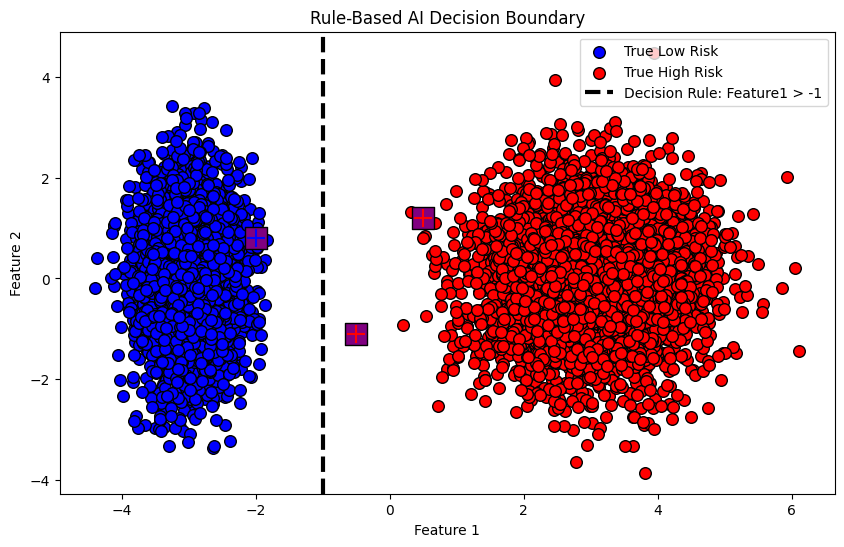

In [77]:
# Plot 2: Show correct vs incorrect predictions

plt.figure(figsize=(10,6))
plt.scatter(X[mask, 0], X[mask, 1], c='blue', marker='o', edgecolor='k', s=70,label='True Low Risk')
plt.scatter(X[~mask, 0], X[~mask, 1], c='red', marker='o', edgecolor='k', s=70,label='True High Risk')

plt.scatter(test_cases[:, 0], test_cases[:, 1], c='purple', marker='s', edgecolor='k' , s=250)


# For red crosses
pred_mask = (predictions == 1)
plt.scatter(test_cases[pred_mask, 0], test_cases[pred_mask, 1], c='red', marker='_', s=150)  # Horizontal lines
plt.scatter(test_cases[pred_mask, 0], test_cases[pred_mask, 1], c='red', marker='|', s=150)  # Vertical lines

# For blue crosses
plt.scatter(test_cases[~pred_mask, 0], test_cases[~pred_mask, 1], c='blue', marker='_', s=150)  # Horizontal lines
plt.scatter(test_cases[~pred_mask, 0], test_cases[~pred_mask, 1], c='blue', marker='|', s=150)  # Vertical lines

plt.axvline(x=-1, color='black', linestyle='--', linewidth=3, label=f'Decision Rule: Feature1 > -1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Rule-Based AI Decision Boundary')
plt.legend()


## When Rules Break Down

Now let's see what happens when our data becomes more complex:


In [78]:
X_complex, y_complex = make_classification(
    n_samples=2000,
    n_features=2,
    n_informative=2,          # Both features are now informative
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=2,   # Multiple clusters per class
    class_sep=1.1,           # Less separation
    random_state=42
)

Lets vizualize our data

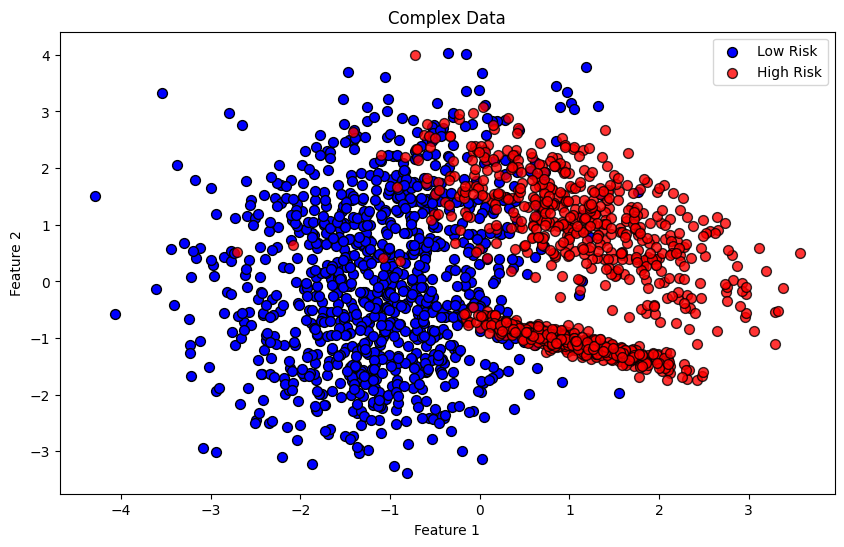

In [79]:
# Plot 1: Complex data
plt.figure(figsize=(10,6))
plt.scatter(X_complex[y_complex==0, 0], X_complex[y_complex==0, 1], c='blue', marker='o', edgecolors='k', s=50, label='Low Risk')
plt.scatter(X_complex[y_complex==1, 0], X_complex[y_complex==1, 1], c='red', marker='o', edgecolors='k',alpha=0.8, s=50, label='High Risk')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Complex Data')
plt.legend()


What would you make the rule now?


## Reflection and Discussion

1. **When do rule-based AI systems work well?**
   - Clear patterns in data
   - Domain expertise available
   - Interpretability is crucial
   - Limited complexity

2. **What are the limitations of rule-based AI?**
   - Difficulty handling complex patterns
   - Need expert knowledge to create rules
   - Don't adapt to new data
   - Break down with exceptions

3. **When might we need Machine Learning instead?**
   - Patterns too complex for simple rules
   - Large amounts of data available
   - Patterns change over time
   - High-dimensional data


## Hour 2: 

Build Your Own Rule-Based AI

In [80]:
X, y = make_classification(
    n_samples=800,      # Total number of samples
    n_features=2,        # Number of features (dimensions)
    n_informative=2,     # Number of informative features
    n_redundant=0,       # Number of redundant features
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0,            # Fraction of samples whose class is randomly exchanged
    class_sep=2,         # Separation between the classes
    hypercube=True,
    random_state=42
)

1. Create a scatter plot of the data, using the y values to correctly color each point according to its class membership.

2. Create the best classification rule you can and visualize it on the graph.

In [84]:
#Lets say we pick Feature 2 > 0.1 == Red Class else Blue Class

3. Use a `for loop` with the `zero_mask` to evaluate all class zero points and tally the misclassifications. 

Hint: keep a running counter that increments whenever a point is misclassified.

## Homework:

No Homework today!